In [90]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [91]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [92]:
# Lectura de datos
datos = pd.read_csv('./assets/On_Time_On_Time_Performance_2015_2ac.csv', delimiter=';')
datos.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2015,1,2,23,1,23/02/2015,AS,19930,AS,N796AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,15,7,15/02/2015,AS,19930,AS,N708AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,22,7,22/02/2015,AS,19930,AS,N706AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,10,2,10/02/2015,OO,20304,OO,N912EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,8,7,8/02/2015,AS,19930,AS,N765AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**DeptTime**=Tiempo de Salida del avión

**DepDelay**= Tiempo de Retraso en la salida del Avión

**ArrDelay**=Retraso en la llegada del avión

**ArrDelayMinutes**= minutos de retraso del avión

In [93]:
# Variables a utilizar
datos_to_use = datos[['DepTime', 'DepDelay', 'ArrDelay', 'ArrDelayMinutes']]
datos_to_use

,DepTime,DepDelay,ArrDelay,ArrDelayMinutes
0,1052,-8,3,3
1,1130,30,26,26
2,1540,16,22,22
3,2220,75,87,87
4,1530,6,2,2
...,...,...,...,...
22134,933,54,47,47
22135,1852,57,48,48
22136,1459,38,49,49
22137,1658,57,51,51


In [94]:
# Eliminar numeros negativos y NaN de los datos
datos_to_use = datos_to_use[datos_to_use['DepTime'] >= 0]
datos_to_use = datos_to_use[datos_to_use['DepDelay'] >= 0]
datos_to_use = datos_to_use[datos_to_use['ArrDelay'] >= 0]
datos_to_use = datos_to_use[datos_to_use['ArrDelayMinutes'] >= 0]
datos_to_use = datos_to_use.dropna()

In [95]:
# Información de la data
print(datos_to_use.info())
print(datos_to_use.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 17191 entries, 1 to 22138
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DepTime          17191 non-null  int64
 1   DepDelay         17191 non-null  int64
 2   ArrDelay         17191 non-null  int64
 3   ArrDelayMinutes  17191 non-null  int64
dtypes: int64(4)
memory usage: 671.5 KB
None
            DepTime      DepDelay      ArrDelay  ArrDelayMinutes
count  17191.000000  17191.000000  17191.000000     17191.000000
mean    1515.478972     37.755046     39.343843        39.343843
std      450.557873     51.817414     53.197378        53.197378
min        1.000000      0.000000      1.000000         1.000000
25%     1157.000000      9.000000      9.000000         9.000000
50%     1542.000000     21.000000     21.000000        21.000000
75%     1853.000000     47.000000     48.000000        48.000000
max     2400.000000   1250.000000   1251.000000      1251.000000


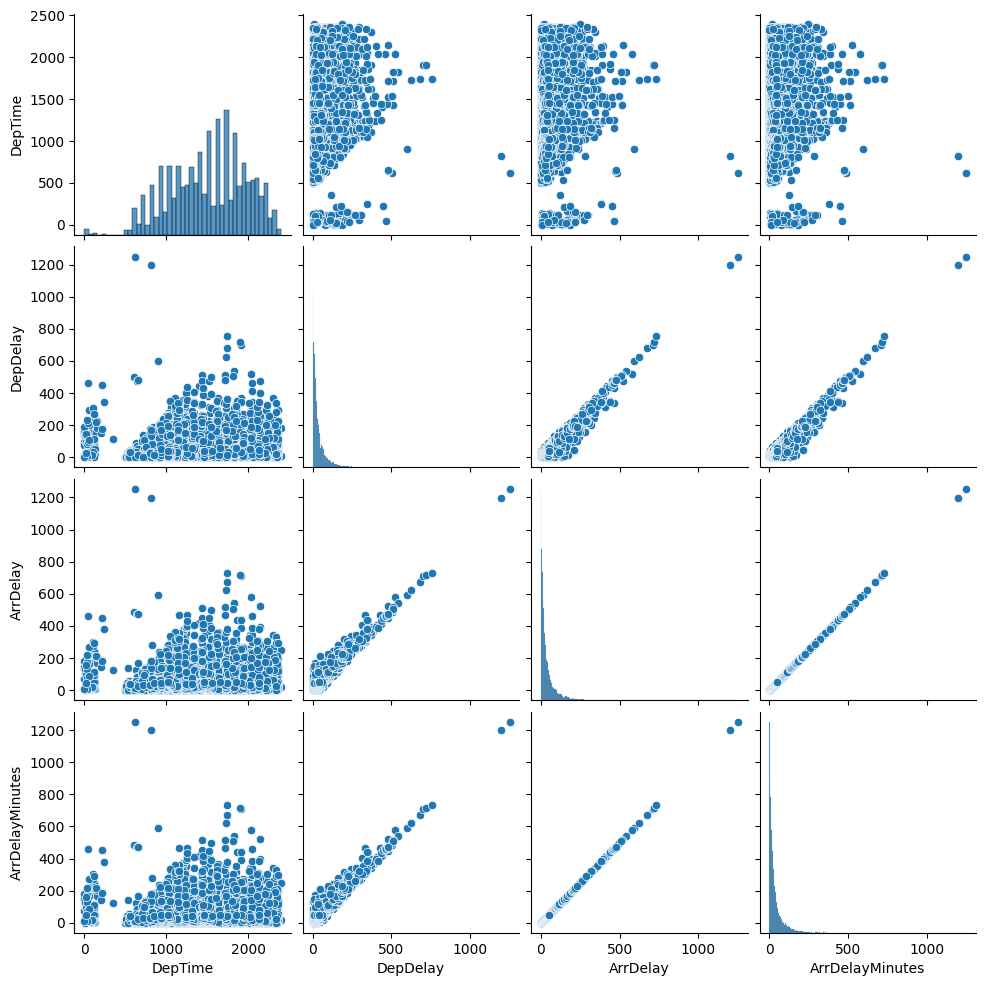

In [96]:
# Graficar variables independientes
sns.pairplot(datos_to_use)

In [97]:
# Correlación entre variables
correlacion = datos_to_use.corr()
correlacion

,DepTime,DepDelay,ArrDelay,ArrDelayMinutes
DepTime,1.000000,0.080597,0.062055,0.062055
DepDelay,0.080597,1.000000,0.962397,0.962397
ArrDelay,0.062055,0.962397,1.000000,1.000000
ArrDelayMinutes,0.062055,0.962397,1.000000,1.000000


In [98]:
# Descripción de los datos
datos_to_use.describe()

,DepTime,DepDelay,ArrDelay,ArrDelayMinutes
count,17191.000000,17191.000000,17191.000000,17191.000000
mean,1515.478972,37.755046,39.343843,39.343843
std,450.557873,51.817414,53.197378,53.197378
min,1.000000,0.000000,1.000000,1.000000
25%,1157.000000,9.000000,9.000000,9.000000
50%,1542.000000,21.000000,21.000000,21.000000
75%,1853.000000,47.000000,48.000000,48.000000
max,2400.000000,1250.000000,1251.000000,1251.000000


### Descripción de los datos.

**Count**: Número de ejemplos para cada columna, por ejemplo DepTime tiene 22139 ejemplos.

**Mean**: Indica el promedio de los valores para cada columna, por ejemplo DepTime tiene un promedio de 1455.08 (Tiempo promedio de tiempo de salida del avión)

**std**: Indica la desviación estándar de los valores para cada columna, por ejemplo DepTime tiene una desviación estándar de 470.71 (Que tan dispersos están los valores de tiempo de salida del avión)

**min**: Indica el valor mínimo de los valores para cada columna, por ejemplo DepTime tiene un valor mínimo de 1 (El tiempo de salida más temprano)

**25%**: Indica el primer cuartil de los valores para cada columna, por ejemplo DepTime tiene un valor de 1108 (El 25% de los valores de tiempo de salida del avión son menores a 1108)

**50%**: Indica la mediana de los valores para cada columna, por ejemplo DepTime tiene un valor de 1502 (El 50% de los valores de tiempo de salida del avión son menores a 1502)

**75%**: Indica el tercer cuartil de los valores para cada columna, por ejemplo DepTime tiene un valor de 1829 (El 75% de los valores de tiempo de salida del avión son menores a 1829)

**max**: Indica el valor máximo de los valores para cada columna, por ejemplo DepTime tiene un valor de 2400 (El tiempo de salida más tarde)


## Analisis grafica variables independientes

Como se puede analizar las variables ArrDelay y DepDelay tienen una correlación positiva, es decir, si una de las dos variables aumenta la otra también lo hace. Por lo tanto, se puede decir que estas dos variables son dependientes entre sí. 

In [99]:
# Preparación de datos
X = datos_to_use[['DepDelay']]
y = datos_to_use['ArrDelay']

In [100]:
# Ver dimensiones
print(X.shape)
print(y.shape)

(17191, 1)
(17191,)


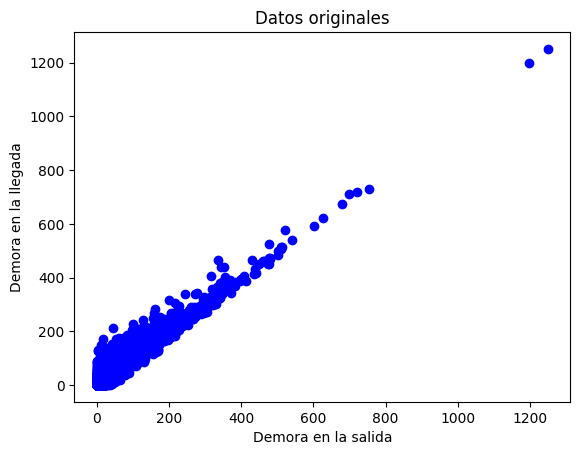

In [101]:
# graficar datos X y
plt.plot(X, y, 'o', color='blue')
plt.xlabel('Demora en la salida')
plt.ylabel('Demora en la llegada')
plt.title('Datos originales')
plt.show()

In [102]:
# División del conjunto de datos Entrenamiento(80%) y Prueba(20%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Longitud de los conjuntos
print(len(x_train))
print(len(x_test))

13752
3439


In [104]:
# Definición del modelo de regresión lineal simple
modelo = LinearRegression()

In [105]:
# Entrenamiento del modelo
modelo.fit(x_train, y_train)

LinearRegression()

In [106]:
# Predicción con el conjunto de entrenamiento
y_train_pred = modelo.predict(x_train)

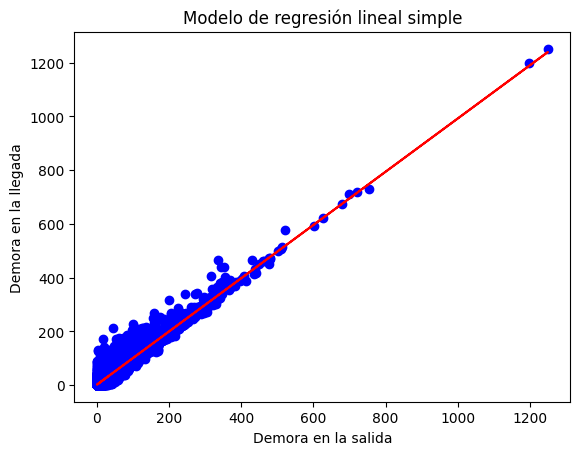

In [107]:
# Graficar scatter plot
plt.plot(x_train, y_train, 'o', color='blue')
plt.plot(x_train, y_train_pred, color='red')
plt.xlabel('Demora en la salida')
plt.ylabel('Demora en la llegada')
plt.title('Modelo de regresión lineal simple')
plt.show()

In [108]:
r2_score(y_train, y_train_pred)

0.9280350532495323

In [109]:
# Predecir nuevos valores
try:
  new_value = int(input('Ingrese la demora en la salida: '))
  new_value = [[new_value]]
  new_prediction = modelo.predict(new_value)
  print('La demora en la llegada es de:', new_prediction[0])
except ValueError:
  print('No es un número válido')

La demora en la llegada es de: 13.946347176061582


/Users/sebastiancb/anaconda3/envs/env-talentotech-bootcamp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [110]:
# Error con los datos de prueba
y_pred_test = modelo.predict(x_test)
r2_score(y_test, y_pred_test)

0.917652629481586

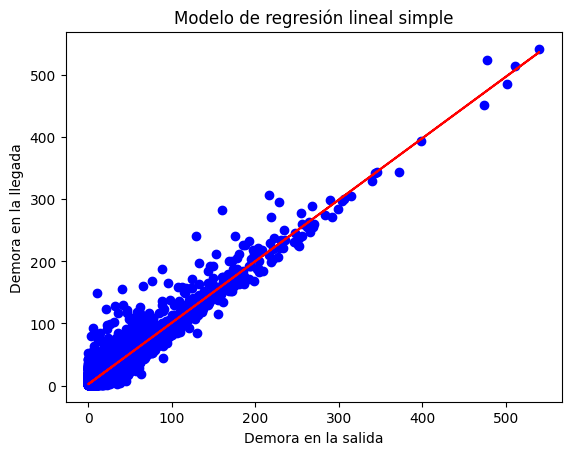

In [111]:
# Grafica de los datos de prueba
plt.plot(x_test, y_test, 'o', color='blue')
plt.plot(x_test, y_pred_test, color='red')
plt.xlabel('Demora en la salida')
plt.ylabel('Demora en la llegada')
plt.title('Modelo de regresión lineal simple')
plt.show()

In [112]:
# Resultados prueba entrenamiento
print('R2 Score Entrenamiento:', r2_score(y_train, y_train_pred))
print('R2 Score Prueba:', r2_score(y_test, y_pred_test))


R2 Score Entrenamiento: 0.9280350532495323
R2 Score Prueba: 0.917652629481586


### Punto B
El primer punto y el segundo ya estan hechos arriba, por lo que se procede a realizar el punto C. 

In [113]:
datos

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2015,1,2,23,1,23/02/2015,AS,19930,AS,N796AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,15,7,15/02/2015,AS,19930,AS,N708AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,22,7,22/02/2015,AS,19930,AS,N706AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,10,2,10/02/2015,OO,20304,OO,N912EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,8,7,8/02/2015,AS,19930,AS,N765AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22134,2015,1,2,12,4,12/02/2015,UA,19977,UA,N477UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22135,2015,1,2,5,4,5/02/2015,OO,20304,OO,N719SK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22136,2015,1,2,20,5,20/02/2015,NK,20416,NK,N502NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22137,2015,1,2,22,7,22/02/2015,AA,19805,AA,N4YRAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
datos_carrier = datos[['Carrier']]
datos_carrier

,Carrier
0,AS
1,AS
2,AS
3,OO
4,AS
...,...
22134,UA
22135,OO
22136,NK
22137,AA


In [115]:
# Filtrar datos quitando OS
datos_carrier = datos_carrier[datos_carrier['Carrier'] != 'OS']
datos_carrier

,Carrier
0,AS
1,AS
2,AS
3,OO
4,AS
...,...
22134,UA
22135,OO
22136,NK
22137,AA


In [116]:
# Eliminar datos vacios de una columna
datos_copy = datos.copy()
# Saber cuales columnas tienen datos vacios
div5totalgtime_column = datos_copy['Div5TotalGTime']
print(len(div5totalgtime_column))
# Eliminar datos vacios
datos_copy = datos_copy[['Div5TotalGTime']].dropna()
print(len(datos_copy['Div5TotalGTime']))


22139
0


In [117]:
# Seleccionar datos con Origen origin
datos.head()
# Ver si existe la columna Origen
datos_origin = datos[['Origin']]
# Contar cuantos datos hay
print(datos_origin['Origin'].value_counts())


Origin
ORD    2309
ATL    1387
DFW    1211
HNL     999
LAX     824
       ... 
ALB       1
CMH       1
RAP       1
OME       1
BFL       1
Name: count, Length: 233, dtype: int64
